In [18]:
!pip install -r requirements.txt
from mindee import Client
import json
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
from IPython.lib.pretty import pretty

In [19]:
mindee_client = Client(
    license_plate_token='<insert api key>',
    raise_on_error=True
)


image height and width in pixels:  1440 2560


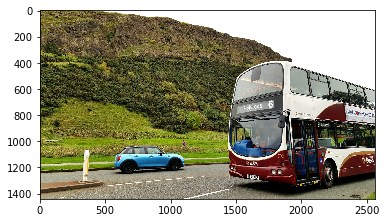

In [20]:
#load image - get height and width - show image
imagepath = 'images/bus.jpg'
image = cv2.imread(imagepath)
#fix colour space
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, channels = image.shape
print ("image height and width in pixels: ", height, width)
plt.imshow(image)
plt.show()


In [21]:
#Call Mindee and print results
parsed_data = mindee_client.parse_license_plate(imagepath)
print(parsed_data.license_plate)

-----Car plate data-----
Filename: bus.jpg
Plate: SN56AEP
----------------------


In [22]:
print(parsed_data.http_response)
data_dump = json.dumps(parsed_data.http_response)
data_json= json.loads(data_dump)

{'api_request': {'error': {}, 'resources': ['document'], 'status': 'success', 'status_code': 201, 'url': 'http://api.mindee.net/v1/products/mindee/license_plates/v1/predict'}, 'document': {'annotations': {'labels': {}}, 'id': 'abaec6dd-a674-4cde-acc3-58b7793f99df', 'inference': {'extras': {}, 'finished_at': '2022-01-11T23:39:04+00:00', 'pages': [{'id': 0, 'prediction': {'license_plates': [{'confidence': 0.99, 'polygon': [[0.617, 0.872], [0.654, 0.872], [0.654, 0.897], [0.617, 0.897]], 'value': 'SN56AEP'}]}}], 'prediction': {'license_plates': [{'confidence': 0.99, 'page_id': 0, 'polygon': [[0.617, 0.872], [0.654, 0.872], [0.654, 0.897], [0.617, 0.897]], 'value': 'SN56AEP'}]}, 'processing_time': 1.533, 'product': {'features': ['license_plates'], 'name': 'mindee/license_plates', 'type': 'standard', 'version': '1.0'}, 'started_at': '2022-01-11T23:39:02+00:00'}, 'n_pages': 1, 'name': 'bus.jpg'}, 'document_type': 'license_plate', 'input_type': 'path', 'filename': 'bus.jpg', 'filepath': 'imag

In [23]:
start_point_x = data_json['document']['inference']['prediction']['license_plates'][0]['polygon'][0][0]
start_point_y = data_json['document']['inference']['prediction']['license_plates'][0]['polygon'][0][1]
end_point_x = data_json['document']['inference']['prediction']['license_plates'][0]['polygon'][2][0]
end_point_y = data_json['document']['inference']['prediction']['license_plates'][0]['polygon'][2][1]


In [24]:
#recalibrate polygon points from percentage to pixel - multiplying fraction of image * number of pixels
#but the pixel must be an integer - round up
start_point = (math.ceil(start_point_x*width), math.ceil(start_point_y*height))
end_point = (math.ceil(end_point_x*width), math.ceil(end_point_y*height))
#red border
color = (255, 0, 0)
thickness = 20
print(start_point, end_point)

(1580, 1256) (1675, 1292)


-----Car plate data-----
Filename: bus.jpg
Plate: SN56AEP
----------------------


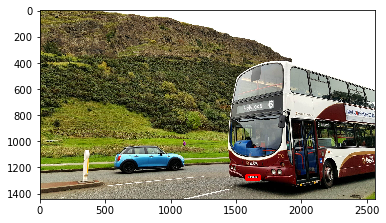

In [25]:
#draw the red rectange around the plate
image2 = cv2.rectangle(image, start_point, end_point, color, thickness)
print(parsed_data.license_plate)
plt.imshow(image2)
plt.show()